In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from matplotlib.path import Path

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM

In [23]:
crime = pd.read_csv('data/crime_london_new.csv')
crime.drop(columns=crime.columns[0], inplace=True)
total_crime = crime[crime.columns[3:]]
monthly_crime = pd.DataFrame(total_crime.sum()).reset_index()
monthly_crime.rename(columns={"index": "Date"}, inplace=True)
monthly_crime["Date"] = pd.to_datetime(monthly_crime["Date"], format="%Y%m")
monthly_crime.set_index("Date", inplace=True)
monthly_crime.rename(columns={0: "CrimeCount"}, inplace=True)

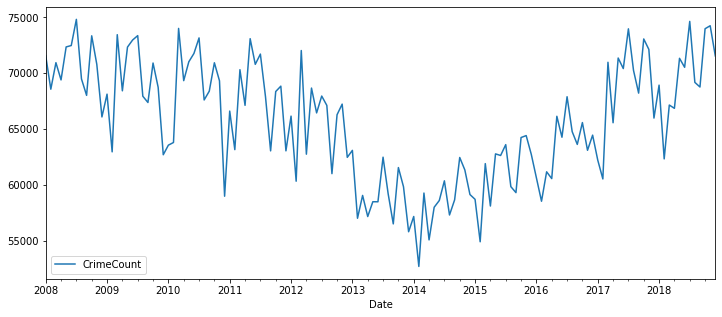

In [29]:
monthly_crime.plot(figsize=(12,5))

In [30]:
monthly_crime.to_csv("monthly_total_crime.csv")

In [44]:
c_zone = ['City of London','Camden','Islington','Kensington and Chelsea','Lambeth','Southwark','Westminster']
e_zone = ['Barking and Dagenham','Bexley','Greenwich','Hackney','Havering', 'Hillingdon', 'Lewisham','Newham','Redbridge','Tower Hamlets','Waltham Forest']
n_zone = ['Barnet','Enfield','Haringey']
s_zone = ['Bromley','Croydon','Merton','Sutton','Wandsworth','Kingston upon Thames']
w_zone = ['Brent','Ealing','Hammersmith and Fulham','Harrow','Richmond upon Thames','Hallingdon','Hounslow']

In [45]:
def infer_zone(borough):
    if borough in c_zone:
        return "Central"
    elif borough in e_zone:
        return "East"
    elif borough in n_zone:
        return "North"
    elif borough in s_zone:
        return "South"
    elif borough in w_zone:
        return "West"
    else:
        return "Other"

In [58]:
crime.head()

,Borough,Major Category,Minor Category,200801,200802,200803,200804,200805,200806,200807,...,201804,201805,201806,201807,201808,201809,201810,201811,201812,Zone
0,Barking and Dagenham,Burglary,Burglary in a Dwelling,82,71,87,74,74,103,113,...,75,93,77,94,84,99,94,106,163,East
1,Barking and Dagenham,Burglary,Burglary in Other Buildings,59,68,56,53,57,39,44,...,65,39,52,40,36,50,61,60,50,East
2,Barking and Dagenham,Criminal Damage,Criminal Damage To Dwelling,79,52,55,73,63,80,73,...,29,32,29,21,29,23,35,21,15,East
3,Barking and Dagenham,Criminal Damage,Criminal Damage To Motor Vehicle,142,138,118,158,126,96,116,...,64,64,67,69,42,38,42,47,33,East
4,Barking and Dagenham,Criminal Damage,Criminal Damage To Other Building,20,19,20,23,16,12,17,...,9,8,8,7,7,11,5,4,7,East


In [47]:
crime["Zone"] = crime["Borough"].apply(infer_zone)

In [48]:
crime["Zone"].value_counts()

East       363
West       198
South      198
Central    198
North       99
Name: Zone, dtype: int64

In [59]:
crime_by_zone = crime[["Zone"] + list(crime.columns[3:-1])]

In [60]:
crime_by_zone.columns

Index(['Zone', '200801', '200802', '200803', '200804', '200805', '200806',
       '200807', '200808', '200809',
       ...
       '201803', '201804', '201805', '201806', '201807', '201808', '201809',
       '201810', '201811', '201812'],
      dtype='object', length=133)

In [63]:
crime_by_zone = crime_by_zone.groupby("Zone").agg(sum)

In [67]:
crime_by_zone.shape

(5, 132)

In [68]:
crime_by_zone = pd.melt(crime_by_zone.reset_index(), id_vars=["Zone"])

In [73]:
crime_by_zone.rename(columns={"variable": "Date", "value": "CrimeCount"}, inplace=True)

In [71]:
crime_by_zone["Date"] = pd.to_datetime(crime_by_zone["Date"], format="%Y%m")

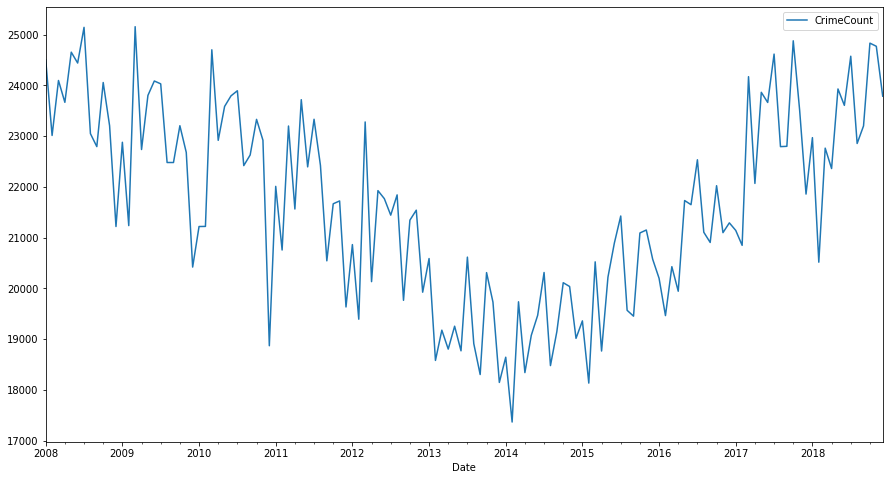

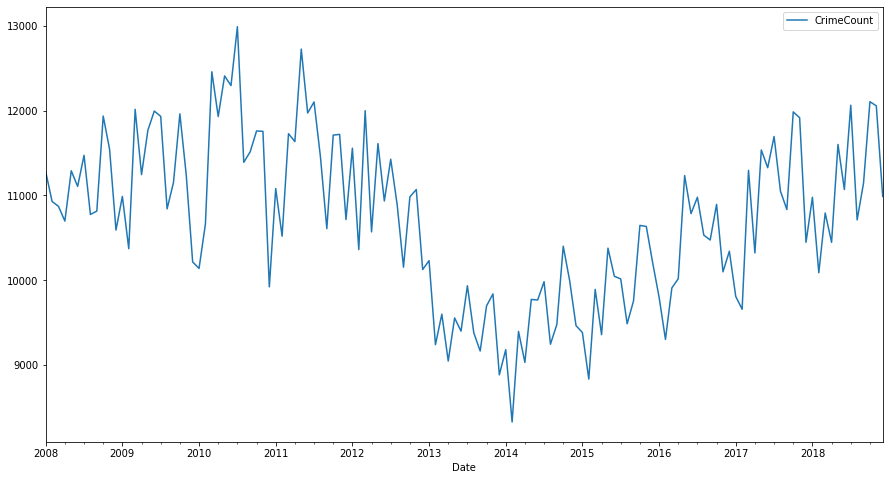

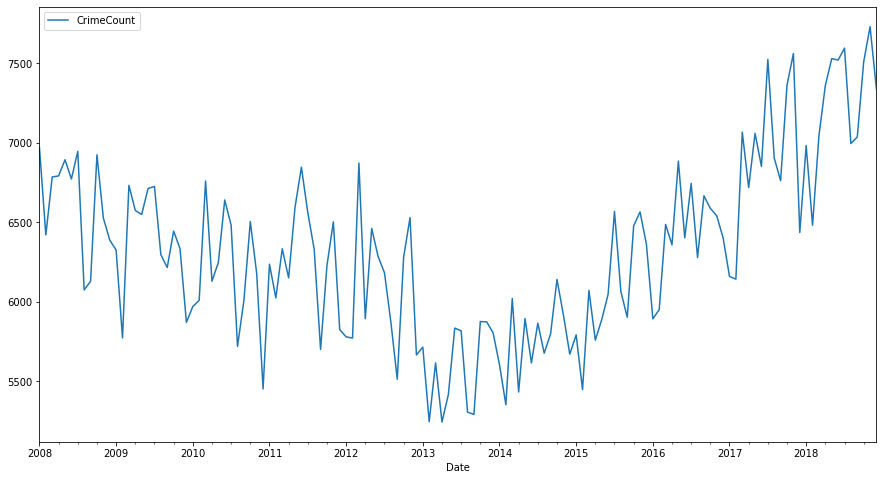

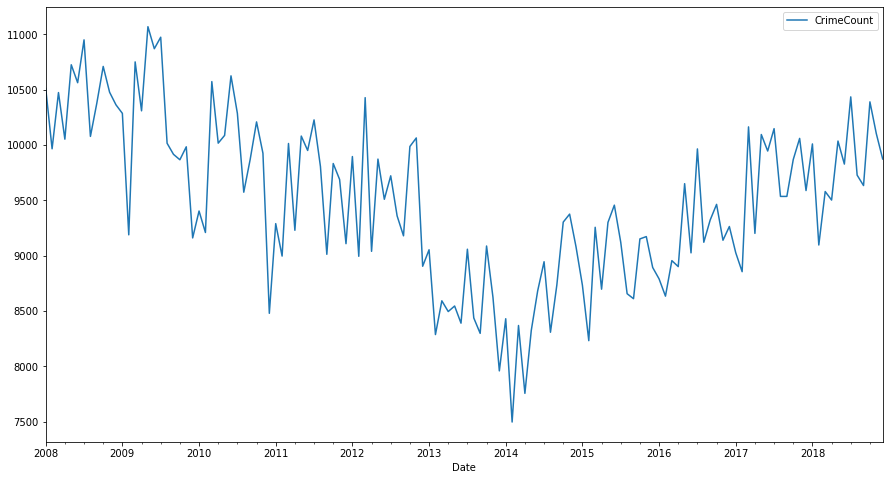

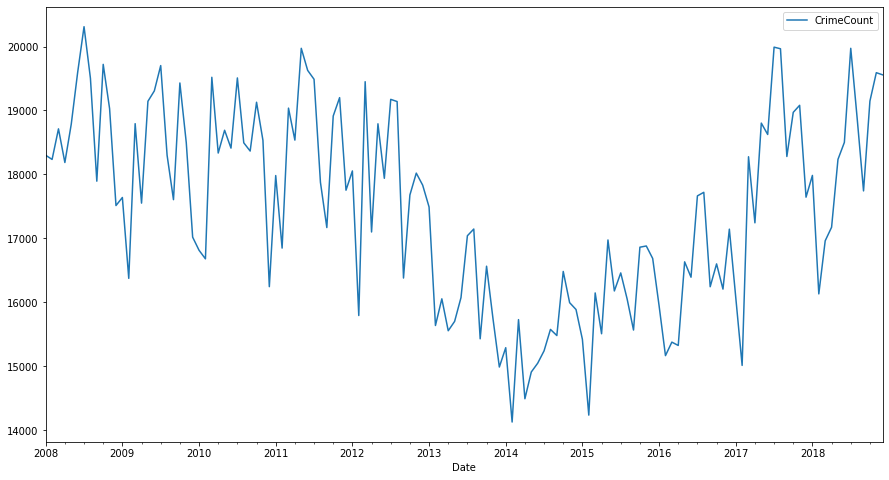

In [88]:
crime_by_zone[crime_by_zone["Zone"] == 'East'].set_index("Date")[["CrimeCount"]].plot(figsize=(15,8))
crime_by_zone[crime_by_zone["Zone"] == 'West'].set_index("Date")[["CrimeCount"]].plot(figsize=(15,8))
crime_by_zone[crime_by_zone["Zone"] == 'North'].set_index("Date")[["CrimeCount"]].plot(figsize=(15,8))
crime_by_zone[crime_by_zone["Zone"] == 'South'].set_index("Date")[["CrimeCount"]].plot(figsize=(15,8))
crime_by_zone[crime_by_zone["Zone"] == 'Central'].set_index("Date")[["CrimeCount"]].plot(figsize=(15,8))

In [90]:
crime_by_zone.pivot(index="Zone", columns="Date", values="CrimeCount")

Date,2008-01-01,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
Zone,,,,,,,,,,,,,,,,,,,,,
Central,18300,18235,18713,18187,18787,19594,20310,19504,17895,19721,...,16963,17175,18236,18501,19972,18882,17743,19147,19591,19557
East,24504,23012,24095,23665,24653,24439,25142,23048,22792,24055,...,22762,22360,23928,23605,24573,22854,23200,24831,24769,23786
North,6970,6421,6786,6792,6894,6773,6947,6075,6129,6925,...,7045,7361,7530,7521,7596,6996,7037,7509,7731,7338
South,10512,9966,10474,10053,10725,10563,10950,10078,10378,10710,...,9580,9503,10036,9828,10435,9728,9634,10390,10103,9874
West,11278,10928,10871,10697,11290,11106,11472,10775,10815,11935,...,10792,10447,11600,11069,12062,10711,11145,12104,12055,10987


In [95]:
crime[["Borough"] + list(crime.columns[3:-1])].groupby("Borough").agg(sum).to_csv("data/crime_by_borough.csv")

In [103]:
east_avg_crime = pd.DataFrame(crime.groupby("Zone").agg(np.mean).loc["East"]).reset_index()

In [104]:
east_avg_crime["index"] = pd.to_datetime(east_avg_crime["index"], format="%Y%m")

In [107]:
east_avg_crime.rename(columns={"index": "Date"}, inplace=True)

In [108]:
east_avg_crime.to_csv("data/east_avg_crime.csv", index=False)